## Load data from well log

Modified from load_las_t02_c...

In [ ]:
pip install lasio


In [1]:
import pandas as pd
import numpy as np
import lasio

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact, interactive, IntSlider

In [2]:
las = lasio.read(r'well_log_fcd6.las')

In [3]:
print(las.curves)

Mnemonic  Unit  Value  Description                                              
--------  ----  -----  -----------                                              
DEPT      F            1 MEASURED DEPTH                                         
LCALR     IN           DENSITY CALIPER/LOWER CALIPER FROM RESISTIVITY LOG       
AT10      OHMM         ARRAY INDUCTION TWO FOOT RESISTIVITY A10                 
AT30      OHMM         ARRAY INDUCTION TWO FOOT RESISTIVITY A30                 
AT90      OHMM         ARRAY INDUCTION TWO FOOT RESISTIVITY A90                 
GRD       GAPI         GAMMA RAY FROM DENSITY LOG                               
APLC_LS   DEC          APS NEAR/ARRAY CORRECTED LIMESTONE POROSITY              
DPO_LS    DEC          HLDS DENSITY POROSITY                                    
DRH       G/C3         BULK DENSITY CORRECTION                                  
PEFL      B/E          LONG SPACED CORRECTED PHOTELECTRIC FACTOR                
RHOM      G/C3         CORRE

In [4]:
df = las.df() 

In [5]:
df.shape

(34329, 25)

In [6]:
df.columns

Index(['LCALR', 'AT10', 'AT30', 'AT90', 'GRD', 'APLC_LS', 'DPO_LS', 'DRH',
       'PEFL', 'RHOM', 'DTCO', 'DTSM', 'DTRP', 'DTRS', 'DT1R', 'DT2R',
       'TNPH_LS', 'HDRA', 'PEFZ', 'DPHZ_LS', 'RHOZ', 'HCALR', 'RLA3', 'RLA4',
       'RLA5'],
      dtype='object')

In [7]:
df = df.rename_axis('Depth').reset_index()

In [8]:
df.isna().sum()

Depth          0
LCALR      24616
AT10       24549
AT30       24524
AT90       24524
GRD          122
APLC_LS    24496
DPO_LS     24614
DRH        24614
PEFL       24649
RHOM       24590
DTCO       18778
DTSM       18778
DTRP       18780
DTRS       18780
DT1R       18780
DT2R       18780
TNPH_LS    10034
HDRA       18944
PEFZ       18876
DPHZ_LS    18876
RHOZ       18876
HCALR      18840
RLA3       18840
RLA4       18840
RLA5       18840
dtype: int64

In [9]:
df.describe()

,Depth,LCALR,AT10,AT30,AT90,GRD,APLC_LS,DPO_LS,DRH,PEFL,RHOM,DTCO,DTSM,DTRP,DTRS,DT1R,DT2R,TNPH_LS,HDRA,PEFZ,DPHZ_LS,RHOZ,HCALR,RLA3,RLA4,RLA5
count,34329.000000,9713.000000,9780.000000,9805.000000,9805.000000,34207.000000,9833.000000,9715.000000,9715.000000,9680.000000,9739.000000,15551.000000,15551.000000,15549.000000,15549.000000,15549.000000,15549.000000,24295.000000,15385.000000,15453.000000,15453.000000,15453.000000,15489.000000,15489.000000,15489.000000,15489.000000
mean,8782.000000,8.769664,26.621263,23.297239,22.488501,55.647713,0.171133,0.065238,-0.001659,4.896863,2.599122,71.060656,127.082301,72.168007,122.221652,125.839513,126.039570,0.249165,0.001815,3.084835,0.106914,2.538923,12.779869,48.987405,85.383861,129.508712
std,4955.036516,0.486514,137.599720,99.295448,114.254683,32.019897,0.066855,0.031668,0.006836,1.054789,0.053695,8.609519,46.694924,8.582860,16.845942,17.077630,17.437038,0.283231,0.015961,0.611199,0.055686,0.090547,0.771210,54.257297,151.939107,788.046568
min,200.000000,7.161900,1.010600,0.967100,0.938600,4.762700,0.004300,-0.074400,-0.240500,2.999100,1.938400,48.503400,88.076800,49.444500,90.544000,86.285300,90.307400,-0.044300,-0.048800,1.294800,-0.154900,1.161900,3.820800,0.614600,0.830000,0.573900
25%,4491.000000,8.604800,3.754600,3.809100,3.778500,26.212600,0.139900,0.048900,-0.004000,4.236550,2.570100,64.438550,107.032400,65.571400,109.204600,112.571400,112.834800,0.087500,-0.003900,2.672000,0.071300,2.489000,12.404500,6.312100,6.559000,7.175900
50%,8782.000000,8.675000,5.956500,5.988000,5.837900,59.695600,0.172800,0.064800,-0.000500,4.647350,2.600000,70.227800,115.919100,71.059900,118.725100,122.548100,122.782200,0.137700,-0.001600,2.919700,0.100400,2.549100,12.532100,23.175800,24.858900,29.375900
75%,13073.000000,8.773400,11.078850,10.867700,10.330700,76.591200,0.204500,0.082450,0.000200,5.243400,2.626800,76.538200,127.858200,77.667000,131.393000,135.984100,136.230500,0.230600,0.001900,3.300300,0.138200,2.596400,12.870300,82.884800,102.624000,120.921700
max,17364.000000,16.051100,2059.955300,1872.764300,2023.366800,289.400900,0.794200,0.451700,0.017500,10.040400,2.839100,142.209400,414.580100,143.246000,179.127500,267.091100,326.212600,1.101300,0.201200,6.759600,0.699000,2.964900,24.836600,399.113300,1881.944100,90299.062500


In [10]:
df.shape

(34329, 26)

In [11]:
#df_filt = df_dropped[(df_dropped.CNPOR > -15)&(df_dropped.CNPOR <= 50)]
#df_filt = df_dropped[(df_dropped.GR > 0) & (df_dropped.GR  <= 250)]
#df_filt = df_dropped[(df_dropped.RHOB> 1) & (df_dropped.RHOB<= 3)]
#df_filt = df_dropped[(df_dropped.DT > 30) & (df_dropped.DT <= 140)]

## Checking traces

In [29]:
df = df.sort_values(by='Depth')
data_len = len(df)
top = df.Depth.min()
bot = df.Depth.max()

cols = ['DTSM','DTCO','RHOZ','TNPH_LS','APLC_LS','DPHZ_LS','GRD'] 

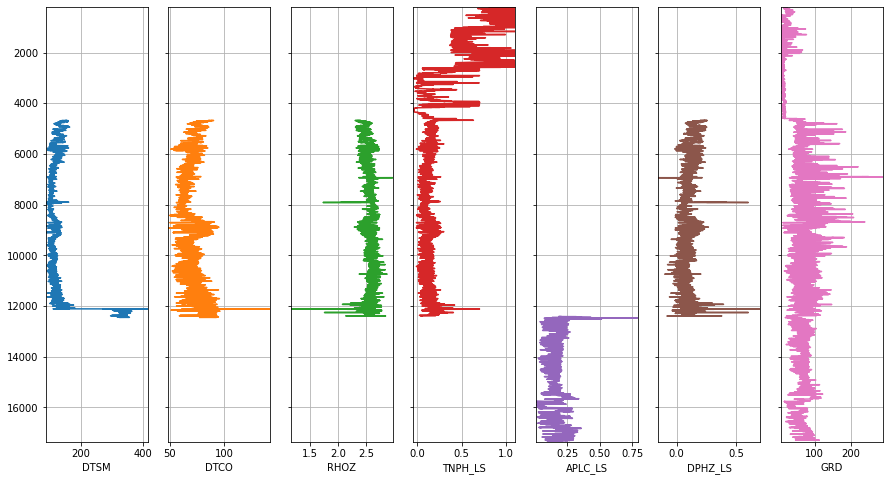

In [30]:
colors_p = plt.rcParams["axes.prop_cycle"]()
colors = [next(colors_p)["color"] for i in range(len(cols))]

f, ax = plt.subplots(nrows=1, ncols=len(cols), figsize=(15,8))

for i,c in enumerate(cols):
  ax[i].plot(df[c], df.Depth, color=colors[i])
  
  ax[i].set_xlabel(c)
  ax[i].set_xlim(df[c].min(),df[c].max())

  ax[i].set_ylim(top,bot)
  ax[i].invert_yaxis()
  ax[i].grid()

for i in range(1,len(cols)):  
  ax[i].set_yticklabels([])

### Interactive display

In [35]:
def trace_plot(st, intv):

  intv = min(intv, data_len-st-1)
  xmin = [0 if df[c][st:st+intv].isnull().all() else df[c][st:st+intv].min() for c in cols]
  xmax = [1 if df[c][st:st+intv].isnull().all() else df[c][st:st+intv].max()+0.1 for c in cols]

  f, ax = plt.subplots(nrows=1, ncols=len(cols), figsize=(20,10))

  for i,c in enumerate(cols):
    ax[i].plot(df[c][st:st+intv], df.Depth[st:st+intv], color=colors[i])
  
    ax[i].set_xlabel(c)
    ax[i].set_xlim(xmin[i], xmax[i])

    ax[i].set_ylim(df.Depth[st],df.Depth[st+intv])
    ax[i].invert_yaxis()
    ax[i].grid()

  for i in range(1,len(cols)):  
    ax[i].set_yticklabels([])

In [37]:
interactive(trace_plot, st=IntSlider(min=0, max=data_len-1000, value=0, step=1000, description="Top"),
                        intv=IntSlider(min=1000, max=data_len, value=20000, step=1000, description="Inteval")
                        )

interactive(children=(IntSlider(value=0, description='Top', max=33329, step=1000), IntSlider(value=20000, desc…

interactive interface example:

<img src="interactive_ss.png">

## Feature correlation matrix

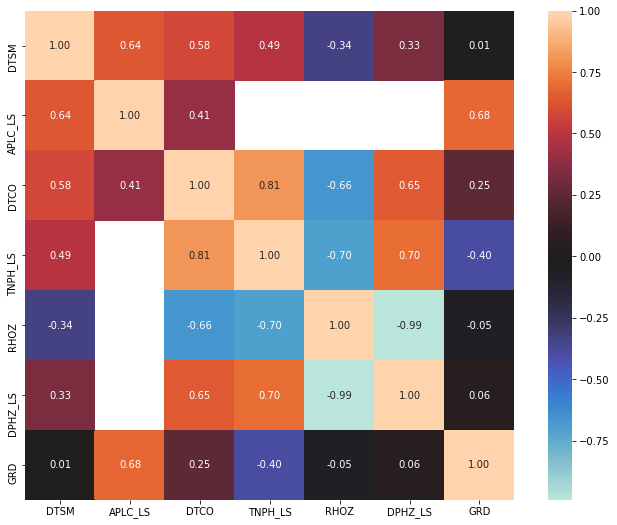

In [16]:
# top attributes correlated with DTSM
cols = ['DTSM','DTCO','RHOZ','TNPH_LS','APLC_LS','DPHZ_LS','GRD']
corrmat = df[cols].corr()
plt.subplots(figsize=(12,9))
#sns.heatmap(corrmat, vmax=1, square=True, annot=True, fmt='.2f', center=0)

k = min(20, df.shape[1]) #number of variables for heatmap
cols = corrmat.abs().nlargest(k, 'DTSM')['DTSM'].index
# cols = corrmat.abs().
sns.heatmap(df[cols].corr(), vmax=1, square=True, annot=True, fmt='.2f', center=0)

## Feature relations

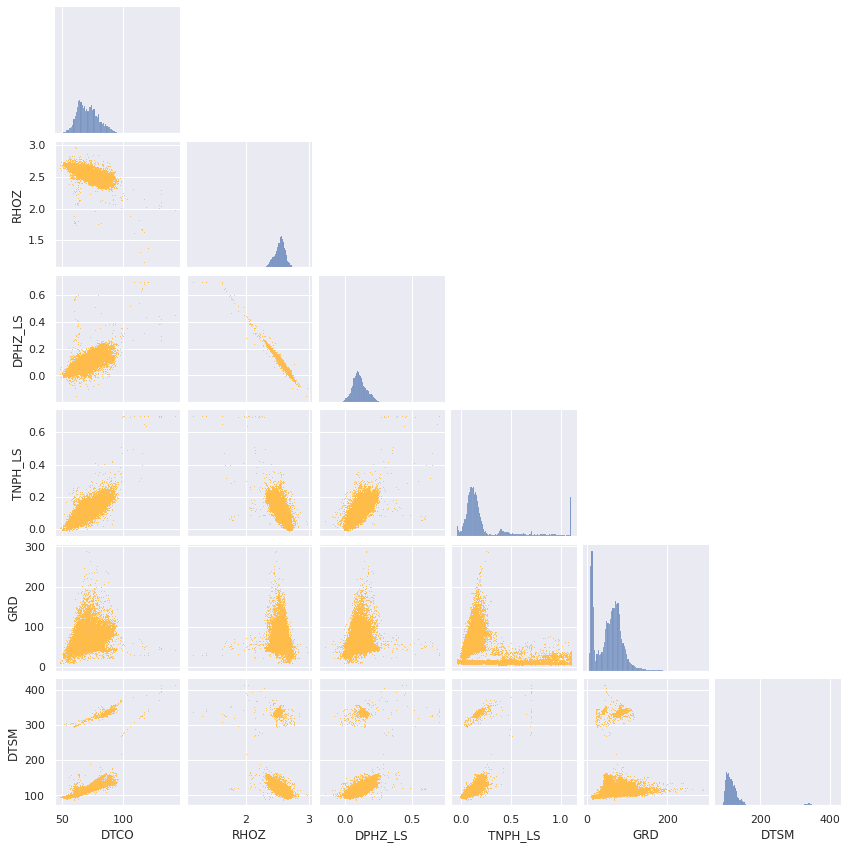

In [49]:
cols2 = ['DTCO','RHOZ', 'DPHZ_LS', 'TNPH_LS','GRD','DTSM'] 

sns.set()
sns.pairplot(df[cols2], corner=True, height=2, plot_kws={"s": 1, "color":"orange"})
plt.show();